# Cause of Deaths in the United States (1999-2015)
This study analyses the leading causes of death in the United States of America between 1999 and 2015.

## a. Data Gathering

In [1]:
import pandas as pd

# Load data 
df = pd.read_csv('NCHS.csv')

# Display data
df.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Alabama,2313.0,52.2
1,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Alaska,294.0,55.9
2,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Arizona,2214.0,44.8
3,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Arkansas,1287.0,47.6
4,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,California,9198.0,28.7


In [2]:
df.shape

(15028, 6)

In [3]:
df = df.dropna() # Remove values with NaN in the dataframe
df.shape

(14917, 6)

In [4]:
causes = df["Cause Name"].unique()
print(causes)
print(len(causes))

['Unintentional Injuries' 'All Causes' "Alzheimer's disease" 'Homicide'
 'Stroke' 'Chronic liver disease and cirrhosis' 'CLRD' 'Diabetes'
 'Diseases of Heart'
 'Essential hypertension and hypertensive renal disease'
 'Influenza and pneumonia' 'Cancer' 'Suicide' 'Kidney Disease'
 "Parkinson's disease" 'Pneumonitis due to solids and liquids'
 'Septicemia']
17


- remove `All Causes` from Cause Name column

In [5]:
df = df[df["Cause Name"] != "All Causes"]
#update value of causes
causes = df["Cause Name"].unique()


print(len(causes))
df.shape

16


(14033, 6)

In [6]:
state = df["State"].unique()
print(state)
print(len(state))

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'United States' 'Utah' 'Vermont'
 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']
52


- remove `United States` in the State

In [7]:
df = df[df["State"] != "United States" ]
state = df["State"].unique()
print(state)
print(len(state))

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']
51


In [8]:
dyear = df.groupby(["Year"]).sum()
dyear.head()

,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
Year,,,,,
1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional InjuriesUnintentional InjuriesUn...,AlabamaAlaskaArizonaArkansasCaliforniaColorado...,2026393.0,37808.1
2000,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional InjuriesUnintentional InjuriesUn...,AlabamaAlaskaArizonaArkansasCaliforniaColorado...,2026971.0,37403.1
2001,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional InjuriesUnintentional InjuriesUn...,AlabamaAlaskaArizonaArkansasCaliforniaColorado...,2031937.0,36922.5
2002,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional InjuriesUnintentional InjuriesUn...,AlabamaAlaskaArizonaArkansasCaliforniaColorado...,2052350.0,36784.2
2003,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional InjuriesUnintentional InjuriesUn...,AlabamaAlaskaArizonaArkansasCaliforniaColorado...,2048554.0,36198.4


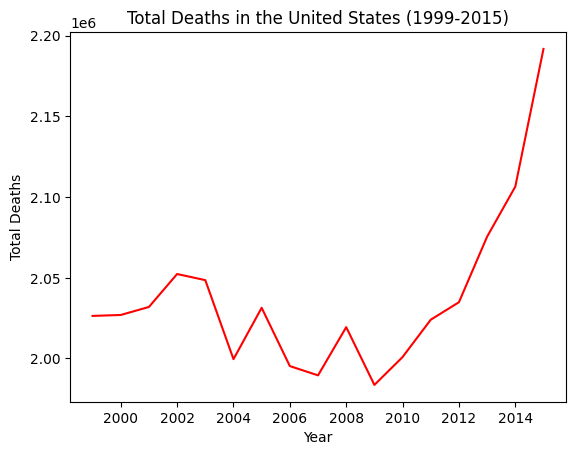

In [9]:
# Line graph for total deaths per year
import matplotlib.pyplot as plt

dyear['Deaths'].plot(color='red')
plt.title('Total Deaths in the United States (1999-2015)')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.show()

In [10]:

#Top Ten Causes of Death in the United States

dataset1 = df[df["Cause Name"] != "All Causes"]

dataset2 = dataset1.groupby("Cause Name")[["Deaths"]].sum()
dataset2.sort_values("Deaths", ascending=False, inplace=True)

dataset2.head(10)



,Deaths
Cause Name,
Diseases of Heart,10939923.0
Cancer,9646498.0
Stroke,2437998.0
CLRD,2280130.0
Unintentional Injuries,2016510.0
Alzheimer's disease,1257309.0
Diabetes,1236321.0
Influenza and pneumonia,987432.0
Kidney Disease,757934.0


<Axes: title={'center': 'Top ten cause of death \n 1999-2015'}, xlabel='Cause Name'>

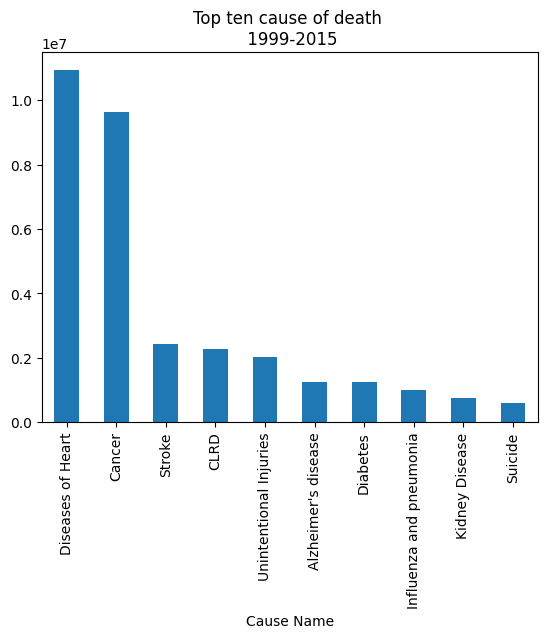

In [11]:
dataset2["Deaths"].head(10).plot.bar(
    title="Top ten cause of death \n 1999-2015"
)


# Case Study 1:  
Cause of Deaths in the United States (1999–2015)**

---

## **1. What is the total number of records in the dataset?**
There were approximately **14,917 deaths** recorded in the United States.

---

## **2. What were the causes of death in this dataset?**
There are **16 causes of death** according to the study dataset.

---

## **3. What is the number of deaths per year from 1999 to 2015?**
- From **2002 to 2009**, the number of deaths **declined**.  
- Then there was an **increase from 2010 to 2013**.  
- In **2013 and 2014**, there was a **sharp rise** in the number of deaths.

---

## **4. Which ten states had the highest number of deaths overall?**
- **California** had the highest number of deaths.  
- **Florida** ranked second.

---

## **5. What were the top causes of death in the United States during this period?**
- **Diseases of the heart** represented the leading cause of death.  
- **Cancer** was the second highest cause.

---
